# Convolution Neural Nets

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=LwM7xabuiIc&t=5362s

Convolutional Neural Network looks similar to the feed forward neural network from lesson number three. The main difference is that we use convolutional filters instead of just dense layers.

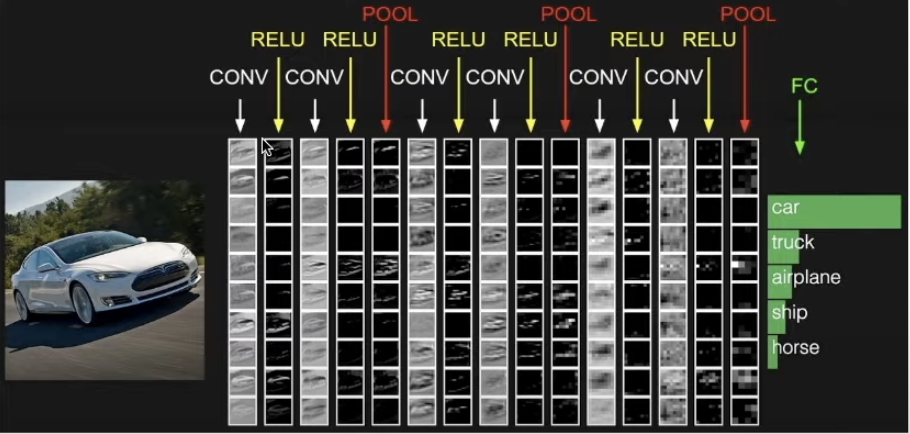

In [1]:
from IPython.display import Image, display

display(Image(filename='images/convolutional_neural_net_1.png', width=600))

Picture above represents a typical architecture of a convnet. We have our input image and then we apply different convolutional layers with activation functions like relu in this example. We also apply pooling layers to reduce the size of our image. Then at the end we do classification and this means that we use a fully connected layer at the end also known as the dense layer with an output for each class that we have.

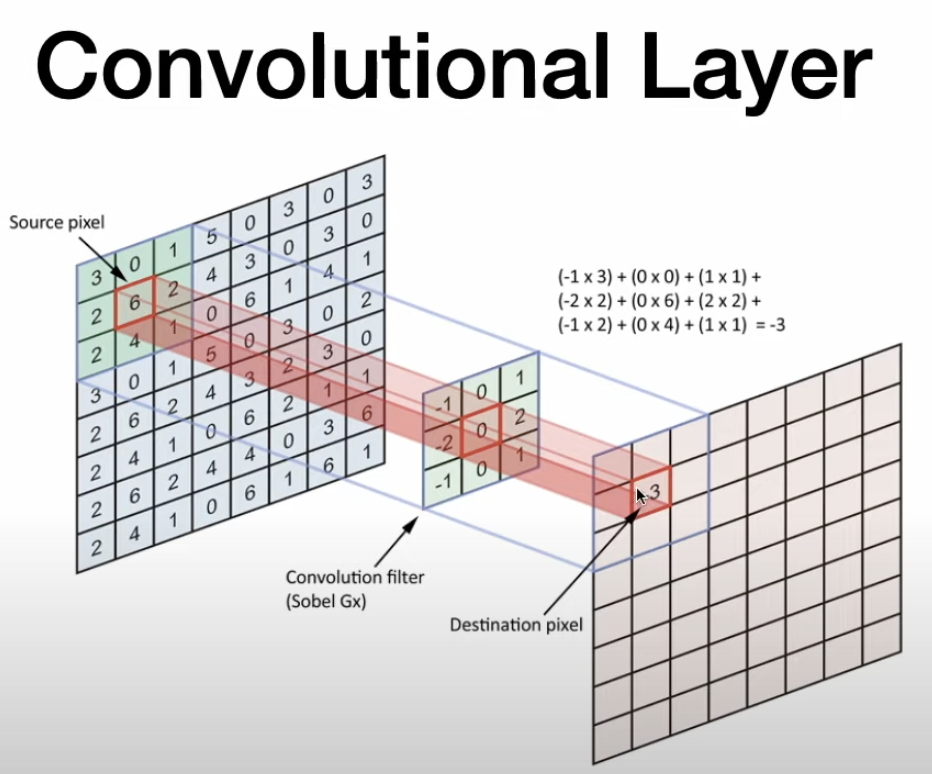

In [2]:
from IPython.display import Image, display

display(Image(filename='images/convolutional_neural_net_2.png', width=600))

Convolutional layer uses convolutional filters and the filter slides over the image and then calculates a new value and writes it into the output image.

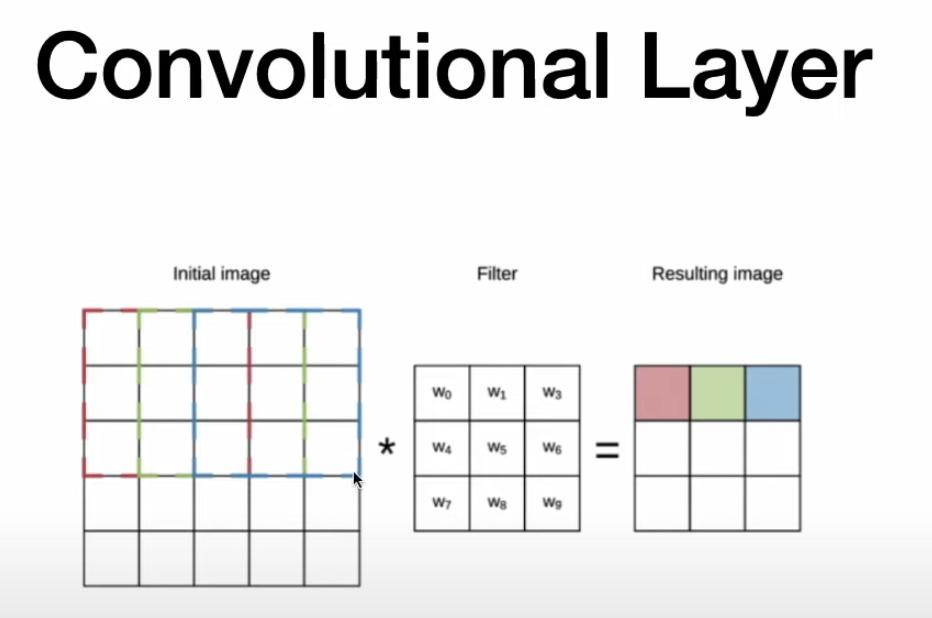

In [3]:
from IPython.display import Image, display

display(Image(filename='images/convolutional_neural_net_3.png', width=600))

At first we put it at the redposition and then we calculate the convolution and write the output. Then we slide it to the next position, so to the green position and do the same calculation and then we slide it to the blue position and again do the same calculation. And this is how we calculate the convolutions.

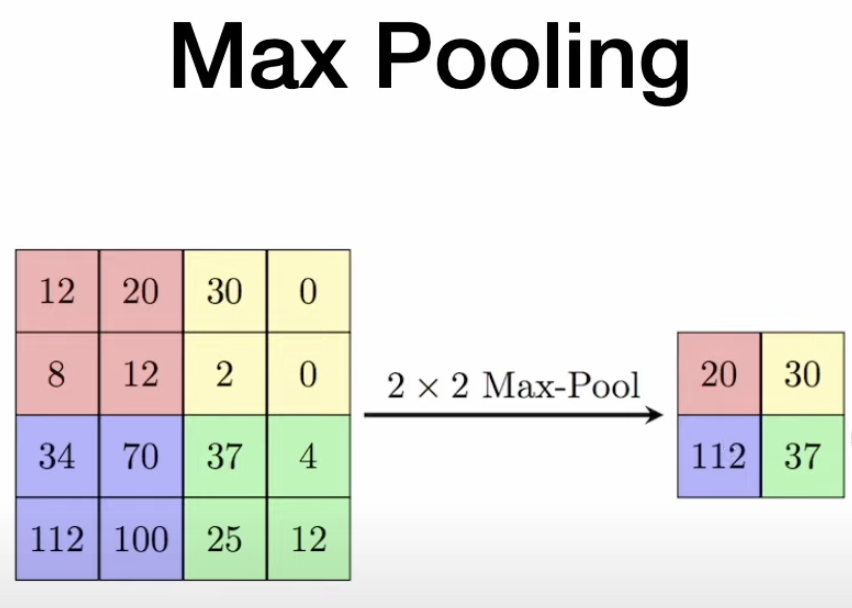

In [4]:
from IPython.display import Image, display

display(Image(filename='images/convolutional_neural_net_4.png', width=600))

We also have to aply max pooling which is also just a filter for example here a 2 by 2 filter. We put it at the first position and calculate just the maximum values and write them to the output. This operation reduces the size of our image.

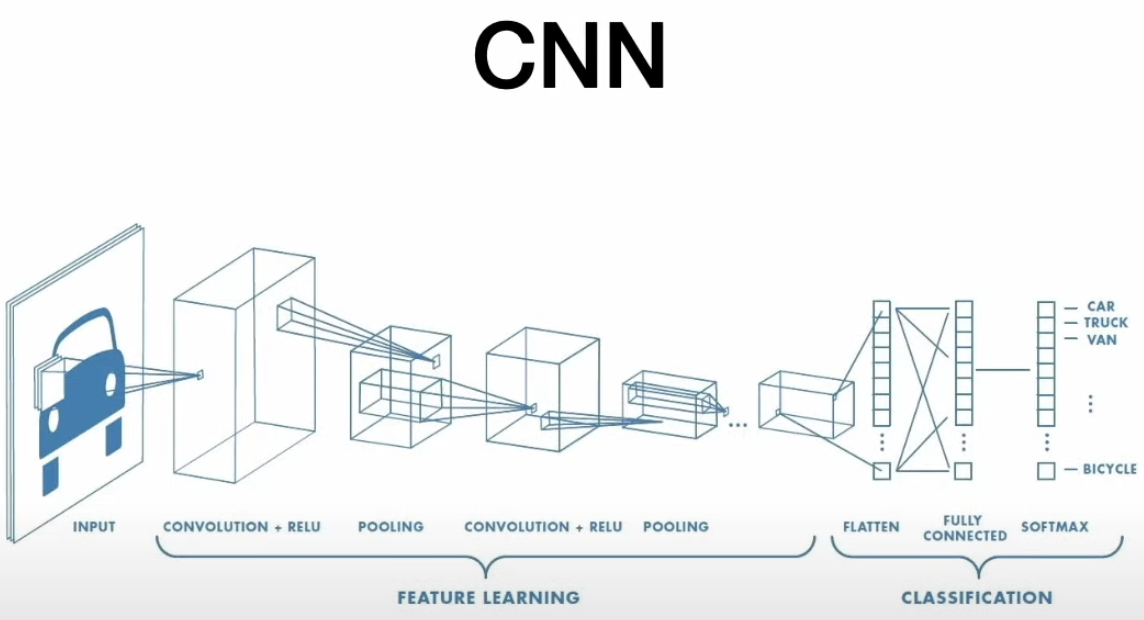

In [5]:
from IPython.display import Image, display

display(Image(filename='images/convolutional_neural_net_5.png', width=600))

We are going to implement the architecture that is presented on the picture above.

We have the input image then we apply convolution plus the relu activation function and then pooling after that we do the same operation again. At the end we flatten the image to squeeze it into one dimension and use a fully connected dense layer with the softmax function and then we do the classification.

## Dataset

We are going to use the CIFAR-10 dataset which is a image dataset of 60000, 32 by 32 color images and it has 10 different classes.

## Code

In [27]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [19]:
cifar10 = keras.datasets.cifar10

In [22]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(train_images.shape) # 50000, 32, 32, 3

170498071/170498071 [==============================] - 71s 0us/step
(50000, 32, 32, 3)


In [23]:
# Normalize: 0,255 -> 0.1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [25]:
def show():
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays
        # which is why we need the etra index
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

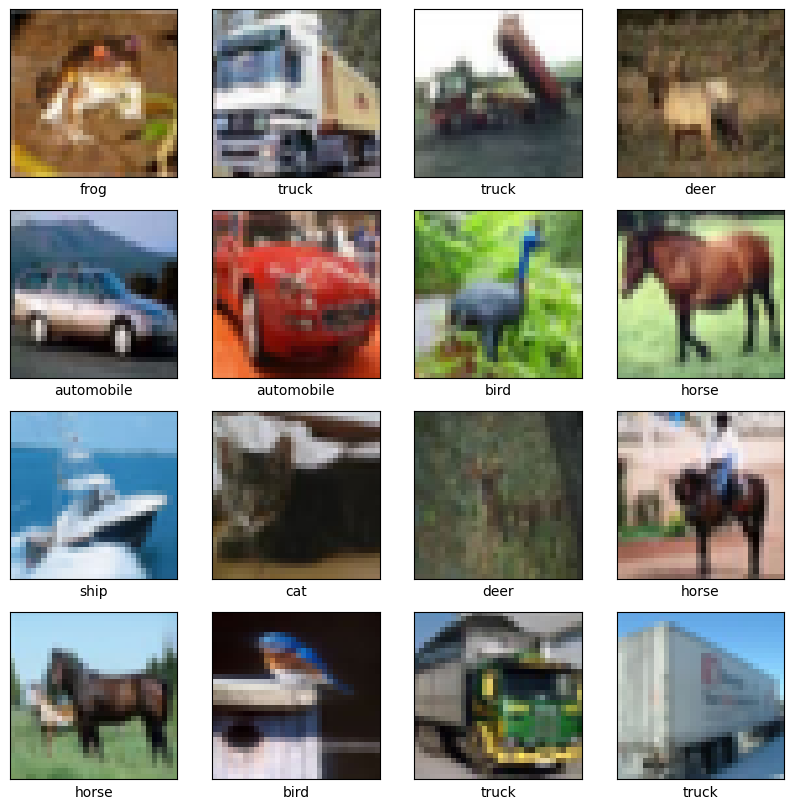

In [28]:
show()

In Conv2D() first we have to specify the number of output filters (32), then we have to specify the filter kernel size (3,3), strides are responsible for sliding by default it is (1,1). Padding can be 'valid' or 'same', two different rules how padding is applied then we specify the activation function liek relu in this case. We also have to specify the input shape.

In [29]:
# model
model = keras.models.Sequential()
# add some coments ? about strides, krenel or padding
model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                7

In [31]:
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim  = keras.optimizers.legacy.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [34]:
# training
batch_size = 64
epochs = 5

model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/5
782/782 - 7s - loss: 1.0197 - accuracy: 0.6414 - 7s/epoch - 8ms/step
Epoch 2/5
782/782 - 7s - loss: 0.9688 - accuracy: 0.6619 - 7s/epoch - 8ms/step
Epoch 3/5
782/782 - 7s - loss: 0.9279 - accuracy: 0.6746 - 7s/epoch - 9ms/step
Epoch 4/5
782/782 - 7s - loss: 0.8899 - accuracy: 0.6889 - 7s/epoch - 9ms/step
Epoch 5/5
782/782 - 7s - loss: 0.8573 - accuracy: 0.7019 - 7s/epoch - 9ms/step


In [35]:
# evaluate
model.evaluate(test_images, test_labels, batch_size=batch_size, verbose=2)

157/157 - 0s - loss: 0.9419 - accuracy: 0.6735 - 487ms/epoch - 3ms/step


[0.9419413208961487, 0.6735000014305115]